In [1]:
# Dependencies.
# SQL Alchemy
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, text

# Data.
import pandas as pd
import numpy as np

# Data Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Other.
import datetime as dt
from time import sleep

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Create engine using the `hawaii.sqlite` database file.
filepath = "../data/hawaii.sqlite"
engine = create_engine(f"sqlite:///{filepath}")

In [3]:
# Declare a Base using `automap_base()`.
Base = automap_base()

# Use the Base class to reflect the database tables.
Base.prepare(autoload_with = engine)

In [4]:
# Print all of the classes mapped to the Base.
Base.classes.keys()

['station', 'measurement']

In [5]:
# Assign the classes as follows...
# 'Measurement' = measurement class.
# 'Station' = station class.
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create a session.
session = Session(engine)

# Inspect Those Tables

In [7]:
# Create an inspector.
inspector = inspect(engine)

In [8]:
# We know the names of the tables... but we need more information about them.
# Get the names of the columns for the two tables.
for table in Base.classes.keys():
    print(table)
    cols = inspector.get_columns(table)
    
    for col in cols:
        print(col)

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}


# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Range: 2016-08-23 to 2017-08-23.
# Create DateTime to use for the filter.
start_date = dt.datetime(2016, 8, 23)
end_date = dt.datetime(2017, 8, 23)

# Make a query to get the date and prcp values within the range.
sel = [Measurement.date, Measurement.prcp]
results = session.query(*sel)\
        .filter(Measurement.date >= start_date)\
        .filter(Measurement.date <= end_date)\
        .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(results, columns = ['date', 'precipitation'])
print(prcp_df.info())
print(prcp_df.head())
print('--------------------------------------------------')

# Clean up the DataFrame... drop the null values and convert the date column to datetime.
prcp_df = prcp_df.dropna()
prcp_df.date = pd.to_datetime(prcp_df.date)
print(prcp_df.info())
print(prcp_df.head())
print('--------------------------------------------------')

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by = 'date', ascending = False).reset_index(drop = True)
print(prcp_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2223 non-null   object 
 1   precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.9+ KB
None
         date  precipitation
0  2016-08-24           0.08
1  2016-08-25           0.08
2  2016-08-26           0.00
3  2016-08-27           0.00
4  2016-08-28           0.01
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2015 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2015 non-null   datetime64[ns]
 1   precipitation  2015 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 47.2 KB
None
        date  precipitation
0 2016-08-24           0.08
1 2016-08

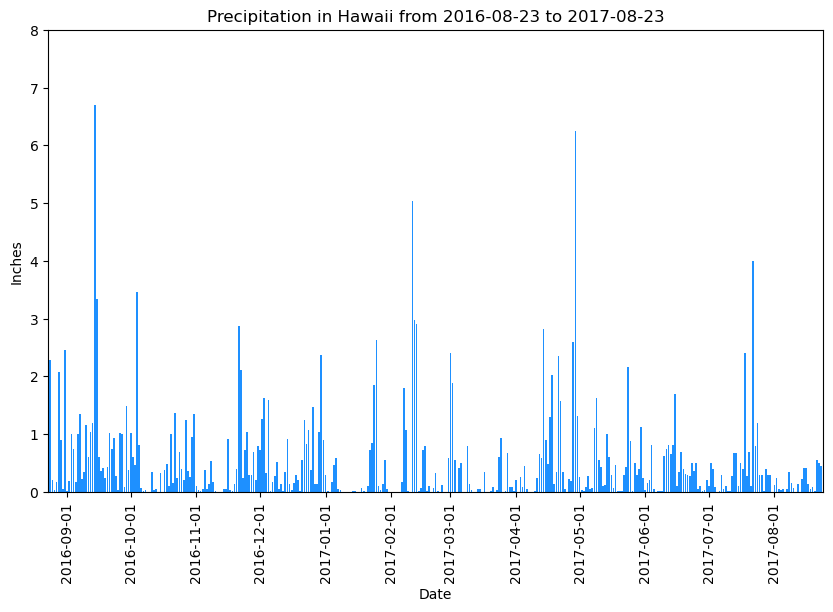

In [11]:
# Plot the data using Pandas plot.
# Or... use matplotlib and make it look better?
# Canvas.
plt.figure(figsize = (10, 6))

# Skeleton.
plt.bar(
    prcp_df.date,
    prcp_df.precipitation,
    color = 'dodgerblue'
)

# Formatting.
plt.title(f'Precipitation in Hawaii from {start_date:%Y-%m-%d} to {end_date:%Y-%m-%d}')

plt.xlabel('Date')
plt.xticks(np.arange(start_date, (end_date + dt.timedelta(days = 31)), dtype='datetime64[M]'), rotation = 90)
plt.xlim(start_date, (end_date + dt.timedelta(days = 1)))

plt.ylabel('Inches')
plt.yticks(np.arange(0, 10, 1))
plt.ylim(0, 8)

# Show.
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data.
display(prcp_df.describe())

,date,precipitation
count,2015,2015.000000
mean,2017-02-16 21:35:38.560794112,0.176462
min,2016-08-24 00:00:00,0.000000
25%,2016-11-18 00:00:00,0.000000
50%,2017-02-15 00:00:00,0.020000
75%,2017-05-17 00:00:00,0.130000
max,2017-08-23 00:00:00,6.700000
std,NaN,0.460288


# Exploratory Station Analysis

In [13]:
for table in Base.classes.keys():
    print(table)
    cols = inspector.get_columns(table)
    
    for col in cols:
        print(col)

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key': 0}


In [14]:
# Calculate the total number of stations in the dataset.
session.query(Station).distinct().count()

9

In [15]:
# Figure out the most active stations (i.e. the stations with most rows in the database).
# List the stations and their counts in descending order.
results = session.query(
    Measurement.station, 
    func.count(Measurement.station),
    Station.name
).group_by(Measurement.station
).filter(Station.station == Measurement.station
).order_by(func.count(Measurement.station).desc()
).all()

for result in results:
    print(f"{result[0]} : {result[2]} has {result[1]} observations.")

# Save the active station for use later.
a_station = results[0]

USC00519281 : WAIHEE 837.5, HI US has 2772 observations.
USC00519397 : WAIKIKI 717.2, HI US has 2724 observations.
USC00513117 : KANEOHE 838.1, HI US has 2709 observations.
USC00519523 : WAIMANALO EXPERIMENTAL FARM, HI US has 2669 observations.
USC00516128 : MANOA LYON ARBO 785.2, HI US has 2612 observations.
USC00514830 : KUALOA RANCH HEADQUARTERS 886.9, HI US has 2202 observations.
USC00511918 : HONOLULU OBSERVATORY 702.2, HI US has 1979 observations.
USC00517948 : PEARL CITY, HI US has 1372 observations.
USC00518838 : UPPER WAHIAWA 874.3, HI US has 511 observations.


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(
    Measurement.station,
    func.min(Measurement.tobs),
    func.max(Measurement.tobs),
    func.avg(Measurement.tobs)
).filter(Measurement.station == a_station[0]
).all()

for result in results:
    print(f"Temperature Statistics for {a_station[0]} : {a_station[2]}.")
    print(f"Lowest temperature observed : {result[1]}.")
    print(f"Highest temperature observed: {result[2]}.")
    print(f"Average observed temperature: {result[3]}.")

Temperature Statistics for USC00519281 : WAIHEE 837.5, HI US.
Lowest temperature observed : 54.0.
Highest temperature observed: 85.0.
Average observed temperature: 71.66378066378067.


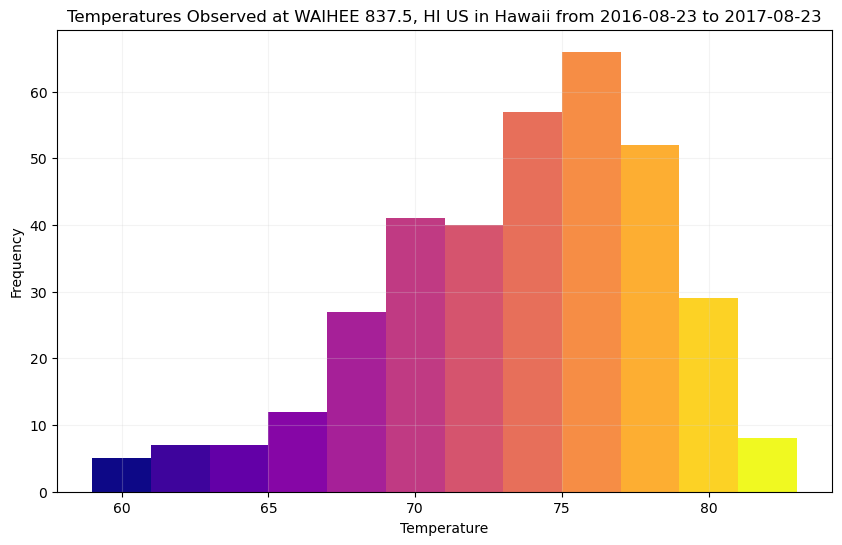

In [17]:
# Query the last 12 months of temperature observations for the most active station and plot the results as a histogram.
results = session.query(
    Measurement.tobs
).filter(Measurement.date >= start_date
).filter(Measurement.date <= end_date
).filter(Measurement.station == a_station[0]
)

temp_df = pd.DataFrame(results, columns = ["temp"]) 

# Plot the data using Pandas plot.
# Or... use matplotlib and make it look better?
# Canvas.
plt.figure(figsize = (10, 6))

# Skeleton.
n, bins, patches = plt.hist(
    temp_df.temp,
    bins = 12,
    color = 'firebrick'
)

# Formatting.
plt.title(f'Temperatures Observed at {a_station[2]} in Hawaii from {start_date:%Y-%m-%d} to {end_date:%Y-%m-%d}')

plt.xlabel('Temperature')
# plt.xticks()
# plt.xlim()

plt.ylabel('Frequency')
# plt.yticks()
# plt.ylim()

plt.grid(color = 'lightgray', alpha = .25)

# Fun colormapping business... 
# Resource used: https://stackoverflow.com/questions/23061657/plot-histogram-with-colors-taken-from-colormap
cm = plt.colormaps['plasma']
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Scale values to [0, 1].
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# Show.
plt.show()

# Close Session

In [18]:
# Close Session.
session.close()